# Project - Old bailey decisions
# Perceptron implementation w/ misc feature exploration

In [ ]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Initializing

np.random.seed(42)
# Using glove here, I think it might be the most effective feature representation
TRAINING_PATH = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/misc_train_processed.csv'
TESTING_PATH = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/misc_test_processed.csv'
EVAL_PATH = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/misc_eval_processed.csv'

TRAINING_PATH_GLOVE = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/glove_misc_train.csv'
TESTING_PATH_GLOVE = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/glove_misc_test.csv'
EVAL_PATH_GLOVE = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/glove_misc_eval.csv'

# TRAINING_PATH_TF = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/tf_misc_train.csv'
# TESTING_PATH_TF = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/tf_misc_test.csv'
# EVAL_PATH_TF = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/tf_misc_eval.csv'

# MISC V2
TRAINING_PATH_TF = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/tf-train-2.csv'
TESTING_PATH_TF = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/tf-test-2.csv'
EVAL_PATH_TF = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/tf-eval-2.csv'


TRAINING_PATH_BOW = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/bow_misc_train.csv'
TESTING_PATH_BOW = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/bow_misc_test.csv'
EVAL_PATH_BOW = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/processed_features/bow_misc_eval.csv'

# Feature vector paths
X_TRAIN = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/extracted features/X_train_vec.npy'
y_TRAIN = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/extracted features/y_train_vec.npy'

X_TEST = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/extracted features/X_test_vec.npy'
y_TEST = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/extracted features/y_test_vec.npy'

X_EVAL = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/extracted features/X_eval_vec.npy'
y_EVAL = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/extracted features/y_eval_vec.npy'

EVAL_IDS = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/project_data/data/eval.ids'


In [ ]:
# Data loading and other helper functions

# Load in csv data and output numpy arrays with data + labels
def load_data(file_path):
    # pandas load csv
    raw_data = pd.read_csv(file_path)
    # I want to convert this to a numpy array

    data = raw_data.to_numpy()
    print(data.shape)
    np_data = data[:,1:]
    np_labels = data[:,0]
    # print("num_examples:",N,"num_dimensions:",D)
    # np_data = np.zeros((N,D))
    # np_labels = np.zeros((N,))
    # for index,instance in enumerate(raw_data):
    #   # Store label in numpy array
    #   label = int(instance[0])
    #   if label == 0:
    #     label = -1
    #   np_labels[index] = label
    #   # Store data
    #   for dim,feat in enumerate(instance[1:]):
    #     feat_index = int(feat.split(":")[0]) - 1
    #     feat_value = float(feat.split(":")[1])
    #     np_data[index][feat_index] = feat_value
    #     # np_data[index][dim] = feat_value
    # print("labels shape:",np_labels.shape)
    # print("intance shape:",np_data.shape)
    return np_data,np_labels

def load_data_np(X,y):
  y[y==0] = -1
  raw_data = np.append(y,X,axis=1)
  bias = np.ones((X.shape[0],1))
  X = np.append(X,bias,axis=1)
  y = np.ravel(y)
  return X,y

def load_ids(file_path):
  with open(file_path) as f:
    raw_data = [int(line.split()[0]) for line in f]
  # print(raw_data)
  return raw_data


# Shuffle data - input data and labels
def shuffle_data(data,labels):
  # concat labels with data
  shuffled_data = np.hstack((data, np.reshape(labels,(labels.shape[0],1))))
  # print(shuffled_data)
  # Shuffle this 
  np.random.shuffle(shuffled_data)
  shuffled_labels = shuffled_data[:,-1]
  shuffled_instances = shuffled_data[:,:-1]
  return shuffled_instances,shuffled_labels

# Getting majority baseline for input data
def get_majority_baseline(labels):
  labels,counts = np.unique(labels,return_counts=True)
  print("labels: ",labels,"counts: ",counts)
  max_index = np.argmax(counts)
  max_label = labels[max_index]
  majority_baseline = counts[max_index] / np.sum(counts)
  return majority_baseline,max_label

# plot learning curve
def plot_learning(x,y,y2,title):
  # Let's plot
  plt.style.use('default')
  plt.rcParams['font.family'] = 'Avenir'
  plt.figure(figsize = (11,4.5))
  # My PCA
  plt.plot(x,y,y2)
  plt.title(title,fontsize=15)
  plt.xlabel("epochs")
  plt.ylabel("training accuracy")
  [i.set_linewidth(0.4) for i in plt.gca().spines.values()]


In [ ]:
# Perceptron class (from hw2)
# Need to update where I used the data class

class Perceptron:
  def __init__(self):
    self.W = None
    self.b = None
    self.W_a = None # averaged weights
    self.b_a = None # Averaged bias
    self.Weights = {} # init empty dict of Weights, add to this for each epoch
    self.accuracies = {} # init empty dict of accuracies, which I store at end of each epoch
    self.val_accuracies = {}
    self.bias = {} # init emmpty dictionary that stores biases 
    self.num_updates = 0 # records number of updates made 

  def initialize_weights(self,num_features):
    self.W = np.array([np.random.uniform(-0.01,0.01) for _ in range(num_features)])
    self.W_a = np.array([np.random.uniform(-0.01,0.01) for _ in range(num_features)])

  def initialize_bias(self):
    self.b = np.random.uniform(-0.01,0.01)
    self.b_a = np.random.uniform(-0.01,0.01)

  # Margin + Averaged + lr decay perceptron
  def train(self,instances,labels,val_X,val_y,epochs,learning_rate,margin,decay=False):
    lr = learning_rate
    t = 0
    c = 0
    num_examples = instances.shape[0]
    num_features = instances.shape[1]
    # Initialize my weights and bias
    self.initialize_weights(num_features)
    self.initialize_bias()

    # Begin epochs
    for epoch in range(epochs):
      # update learning rate
      if decay == True:
        lr = learning_rate / (1 + t)
      # shuffle the data around 
      X,y = shuffle_data(instances,labels)
      # Iterate through examples, performing updates if criteria not met
      for i in range(num_examples):
        a = self.W.T.dot(X[i]) + self.b
        c += 1
        if y[i]*a < margin:
          self.W += lr*y[i]*X[i]
          self.b += lr*y[i]
          # iterate update
          self.num_updates += 1
        # Add to the averaged weights and bias 
        self.W_a += self.W 
        self.b_a += self.b 
      #increment t
      t += 1
      # store this iteration of weights 
      self.Weights[epoch] = self.W_a 
      self.bias[epoch] = self.b_a 
      # store the accuracy of these weights and biases
      self.val_accuracies[epoch] = self.get_accuracy_own_weights(val_X,val_y,self.W_a,self.b_a)
      self.accuracies[epoch] = self.get_accuracy_own_weights(X,y,self.W_a,self.b_a)
      

  # Averaged Perceptron
  def train_averaged(self,instances,labels,epochs,learning_rate):
    lr = learning_rate
    num_examples = instances.shape[0]
    num_features = instances.shape[1]
    # Initialize my weights and bias
    self.initialize_weights(num_features)
    self.initialize_bias()

    # Begin epochs
    for epoch in range(epochs):
      # shuffle the data around 
      X,y = shuffle_data(instances,labels)
      # Iterate through examples, performing updates if criteria not met
      for i in range(num_examples):
        a = self.W.T.dot(X[i]) + self.b
        if y[i]*a < 0:
          self.W += lr*y[i]*X[i]
          self.b += lr*y[i]
          # iterate update
          self.num_updates += 1
        # Add to the averaged weights and bias 
        self.W_a += self.W
        self.b_a += self.b
      # store this iteration of weights 
      self.Weights[epoch] = self.W_a
      self.bias[epoch] = self.b_a
      # store the accuracy of these weights and biases
      self.accuracies[epoch] = self.get_accuracy_own_weights(X,y,self.W_a,self.b_a)

  # Margin Perceptron
  def train_margin(self,instances,labels,epochs,learning_rate,margin):
    lr = learning_rate
    t = 0
    num_examples = instances.shape[0]
    num_features = instances.shape[1]
    # Initialize my weights and bias
    self.initialize_weights(num_features)
    self.initialize_bias()

    # Begin epochs
    for epoch in range(epochs):
      # update learning rate
      lr = learning_rate / (1 + t)
      # shuffle the data around 
      X,y = shuffle_data(instances,labels)
      # Iterate through examples, performing updates if criteria not met
      for i in range(num_examples):
        a = self.W.T.dot(X[i]) + self.b
        if y[i]*a < margin:
          self.W += lr*y[i]*X[i]
          self.b += lr*y[i]
          # iterate update
          self.num_updates += 1
      # store this iteration of weights 
      self.Weights[epoch] = self.W
      self.bias[epoch] = self.b
      # store the accuracy of these weights and biases
      self.accuracies[epoch] = self.get_accuracy_own_weights(X,y,self.W,self.b)
      #increment t
      t += 1

  def get_best_weights_and_bias(self):
    # print(self.accuracies.items())
    best_epoch = max(self.accuracies,key=self.accuracies.get)
    # print("best epoch: ",best_epoch)
    return self.Weights[best_epoch],self.bias[best_epoch],best_epoch

  def predict(self,data):
    predictions = np.sign(data.dot(self.W) + self.b)
    return predictions

  def get_predict_accuracy(self,X,y):
    predictions = self.predict(X)
    equal = np.equal(predictions,y)
    return np.sum(equal)/X.shape[0]

  def get_accuracy_own_weights(self,X,y,W,b):
    predictions = np.sign(X.dot(W) + b)
    equal = np.equal(predictions,y)
    return np.sum(equal)/X.shape[0]



In [ ]:
# LOADING DATA + MAKING VALIDATION FOLDS

# Misc
# X_train, y_train = load_data(TRAINING_PATH)
# X_test, y_test = load_data(TESTING_PATH)

#Glove
# X_train, y_train = load_data(TRAINING_PATH_GLOVE)
# X_test, y_test = load_data(TESTING_PATH_GLOVE)

#TF-IDF - this performs much better for perceptron! - takes awhile, enormous csvs...
# in future save stuff more efficiently, like in numpy arrays or something
X_train, y_train = load_data(TRAINING_PATH_TF)
X_test, y_test = load_data(TESTING_PATH_TF)

# BAG - can can load with tfidf loader
# X_train, y_train = load_data(TRAINING_PATH_BOW)
# X_test, y_test = load_data(TESTING_PATH_BOW)

# Feat VEC
# NN feature vecs

# X_train = np.load(X_TRAIN)
# y_train = np.load(y_TRAIN)
# X_test = np.load(X_TEST)
# y_test = np.load(y_TEST)
# X_eval = np.load(X_EVAL)
# y_eval = np.load(y_EVAL)

# X_train, y_train = load_data_np(X_train,y_train)
# X_test,y_test = load_data_np(X_test,y_test)
# X_eval,y_eval = load_data_np(X_eval,y_eval)



# Majority baseline
most_frequent_training_label = get_majority_baseline(y_train)
most_frequent_testing_label = get_majority_baseline(y_test)
print("training majority baseline: ",most_frequent_training_label)
print("testing majority baseline: ",most_frequent_testing_label)

# Validation splits - split training data into k splits
# After splitting, X_train_folds and
# y_train_folds should each be lists of length num_folds, where
# y_train_folds[i] is the label vector for the points in X_train_folds[i].
k = 5
X_train_folds = np.array_split(X_train,k)
y_train_folds = np.array_split(y_train,k)



(17500, 10052)
(2250, 10052)
labels:  [-1.  1.] counts:  [8810 8690]
labels:  [-1.  1.] counts:  [1099 1151]
training majority baseline:  (0.5034285714285714, -1.0)
testing majority baseline:  (0.5115555555555555, 1.0)


In [ ]:
# Cross val to explore hyper parameters


# learning_rates = [1e-4, 5e-4, 1e-3, 1e-2, 1, 5]
# margins = [0, 0.1, 1, 5, 10, 50, 100]
# decays = [True, False]
# epochs = 15
# best lr:  1 best margin:  10 best-decay:  False cross-val accuracy:  0.7091714285714287

learning_rates = [0.001, 0.1, 1, 5]
margins = [0, 0.5, 1, 10, 100]
decays = [True, False]
epochs = 5

 # dictionaries storing accuracies corresponding to certain hyper parameter combinations
mean_accuracies = {} 
standard_deviations = {}

for lr in learning_rates:
  accuracies = []
  for margin in margins:
    # Need to concatenate 4 of the folds into one training set and leave out one as my test set
    for decay in decays:
      for i in range(k):
        # Set validation data
        val_X = X_train_folds[i]
        val_y = y_train_folds[i]
        # set training data
        train_X = np.concatenate([ fold for index,fold in enumerate(X_train_folds) if index != i])
        train_y = np.concatenate([ fold for index,fold in enumerate(y_train_folds) if index != i])
        # train on validation and training folds
        perceptron = Perceptron()
        
        perceptron.train(train_X,train_y,val_X,val_y,epochs,learning_rate=lr,margin=margin,decay=decay)

        weights,bias,best_epoch = perceptron.get_best_weights_and_bias()
        val_accuracy = perceptron.get_accuracy_own_weights(val_X,val_y,weights,bias)
        accuracies.append(val_accuracy)
        print("Progress:",i/k * 100)
      
      mean_accuracies[(lr,margin,decay)] = np.mean(accuracies)
      standard_deviations[(lr,margin,decay)] = np.std(accuracies)
      print(mean_accuracies)

print(mean_accuracies.items())
print(standard_deviations.items())
best_vals = max(mean_accuracies,key=mean_accuracies.get)
print("best lr: ",best_vals[0],"best margin: ",best_vals[1],"best-decay: ",best_vals[2],"cross-val accuracy: ",mean_accuracies[best_vals])


Progress: 0.0
Progress: 20.0
Progress: 40.0
Progress: 60.0
Progress: 80.0
{(0.001, 0, True): 0.8969142857142858}
Progress: 0.0
Progress: 20.0
Progress: 40.0
Progress: 60.0
Progress: 80.0
{(0.001, 0, True): 0.8969142857142858, (0.001, 0, False): 0.8960571428571429}
Progress: 0.0
Progress: 20.0
Progress: 40.0
Progress: 60.0
Progress: 80.0
{(0.001, 0, True): 0.8969142857142858, (0.001, 0, False): 0.8960571428571429, (0.001, 0.5, True): 0.896057142857143}
Progress: 0.0
Progress: 20.0
Progress: 40.0
Progress: 60.0
Progress: 80.0
{(0.001, 0, True): 0.8969142857142858, (0.001, 0, False): 0.8960571428571429, (0.001, 0.5, True): 0.896057142857143, (0.001, 0.5, False): 0.8962428571428571}
Progress: 0.0
Progress: 20.0
Progress: 40.0
Progress: 60.0
Progress: 80.0
{(0.001, 0, True): 0.8969142857142858, (0.001, 0, False): 0.8960571428571429, (0.001, 0.5, True): 0.896057142857143, (0.001, 0.5, False): 0.8962428571428571, (0.001, 1, True): 0.8959085714285715}
Progress: 0.0
Progress: 20.0
Progress: 40.

In [ ]:
print(mean_accuracies.items())
print(standard_deviations.items())
best_vals = max(mean_accuracies,key=mean_accuracies.get)
print("best lr: ",best_vals[0],"best margin: ",best_vals[1],"best-decay: ",best_vals[2],"cross-val accuracy: ",mean_accuracies[best_vals])


dict_items([((1, 0, True), 0.8293142857142858), ((1, 0, False), 0.8297714285714285), ((1, 0.5, True), 0.8303238095238095), ((1, 0.5, False), 0.8304714285714285), ((1, 1, True), 0.8307771428571428), ((1, 1, False), 0.8309238095238094), ((1, 10, True), 0.8280571428571429), ((1, 10, False), 0.8269714285714287), ((5, 0, True), 0.8290285714285714), ((5, 0, False), 0.8298285714285715), ((5, 0.5, True), 0.8296), ((5, 0.5, False), 0.8299142857142858), ((5, 1, True), 0.8297485714285715), ((5, 1, False), 0.8297619047619048), ((5, 10, True), 0.8301877551020408), ((5, 10, False), 0.8302071428571429)])
dict_items([((1, 0, True), 0.007937716733341897), ((1, 0, False), 0.00791980210018677), ((1, 0.5, True), 0.007249014320359712), ((1, 0.5, False), 0.007292307940703064), ((1, 1, True), 0.007559946009957321), ((1, 1, False), 0.0073136470455290765), ((1, 10, True), 0.009894322075283684), ((1, 10, False), 0.009936902979114095), ((5, 0, True), 0.007460590336110501), ((5, 0, False), 0.00669230444432337), (

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


number of updates:  74600
best training set accuracy:  0.8988571428571429
final test accuracy:  0.848


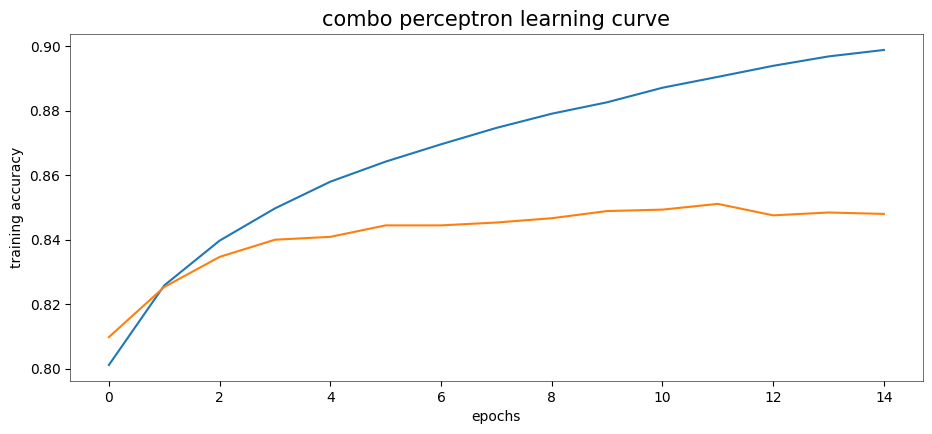

In [ ]:
# test combo perceptron

epochs = 15
learning_rate = 1 #5
margin = 5 #.1
# MISC lr=5 margin = .1
# GLOVE: lr = 1e-1; margin=10
# TFIDF: lr: 1; margin=5
# FEAT VEC: lr: 0.001, margin = 0, decay = True
decay = False
perceptron = Perceptron()
perceptron.train(X_train,y_train,X_test,y_test,epochs,learning_rate,margin,decay=decay)
# perceptron.train_averaged(X_train,y_train,epochs,learning_rate)
print("number of updates: ",perceptron.num_updates)
# Get the best weights and bias from this training
W,b,best_epoch = perceptron.get_best_weights_and_bias()
# training set accuracy:
print("best training set accuracy: ", perceptron.accuracies[best_epoch] )
# Use these weights and bias to evaluate on the test set
test_accuracy = perceptron.get_accuracy_own_weights(X_test,y_test,W,b)
print("final test accuracy: ",test_accuracy)

y = list(perceptron.accuracies.values())
x = [i for i in range(epochs)]
y_val = list(perceptron.val_accuracies.values())
title = 'combo perceptron learning curve'
plot_learning(x,y,y_val,title)

## Save weights (and bias)

In [ ]:
outfile = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/perceptron_weights.npy'
np.save(outfile, W)

In [ ]:
outfile = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/perceptron_bias.npy'
np.save(outfile, b)

In [ ]:
# Run on eval and return submission file in csv w labels columns: "example_id" "label"
X_eval,y_eval = load_data(EVAL_PATH_TF)
eval_ids = np.reshape(np.array(load_ids(EVAL_IDS),dtype=np.int32),(X_eval.shape[0],1))


(5250, 10052)


In [ ]:
predictions = np.sign(X_eval.dot(W) + b)
# print(predictions)
predictions[predictions == -1] = 0
predictions = np.reshape(predictions,(X_eval.shape[0],1))
# print(predictions)
eval_out = np.hstack((eval_ids,predictions))
# print(eval_out)
eval_df = pd.DataFrame(data = eval_out,index = None,columns=['example_id','label'])
save_to_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning 2020/old-bailey-decisions/perceptron_v2_misc2_evals.csv'
eval_df.to_csv(path_or_buf=save_to_path,index=False)